# 数据分析
计算目标:每辆出租车的里程利用率、时间利用率、总空驶时间
存储在`taxi_df`中

In [19]:
# 模块导入
import pandas as pd
import matplotlib.pyplot as plt
# plt设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
# 数据读取
trip_df = pd.read_pickle('trip_df.pkl')
# 异常值检查:
print(len(trip_df[trip_df['distance'] == 0])) # 轨迹长度为0
print(len(trip_df[trip_df['start_time'] == trip_df['end_time']])) # 行程时间为0

0
0


In [4]:
""" 
根据trip_df中的数据，计算每辆出租车的里程利用率、时间利用率、总空驶时间，
并将结果保存到taxi_df中

taxi_df 说明：

    taxi_id: 出租车id
    mileage_utilization: 里程利用率
    time_utilization: 时间利用率
    empty_time: 总空驶时间
"""

taxi_df = pd.DataFrame(columns=['taxi_id', 'mileage_utilization', 'time_utilization', 'empty_time'])
for taxi_id in trip_df['taxi_id'].unique():
    # 计算每辆出租车的里程利用率、时间利用率、总空驶时间
    mileage_utilization = trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==1)]['distance'].sum() / \
        trip_df[trip_df['taxi_id']==taxi_id]['distance'].sum()
    time_utilization = (trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==1)]['end_time'].sum() - \
                        trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==1)]['start_time'].sum()) / \
                            (trip_df[trip_df['taxi_id']==taxi_id]['end_time'].sum() - \
                             trip_df[trip_df['taxi_id']==taxi_id]['start_time'].sum())
    empty_time = trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==0)]['end_time'].sum() - \
        trip_df[(trip_df['taxi_id']==taxi_id) & (trip_df['passenger']==0)]['start_time'].sum()
    # 将计算结果记录到taxi_df中
    new_row = pd.DataFrame({'taxi_id': taxi_id, 'mileage_utilization': mileage_utilization, 'time_utilization': time_utilization, 'empty_time': empty_time}, index=[0])
    taxi_df = pd.concat([taxi_df, new_row], ignore_index=True)


计算目标:成都市一天内的打车需求时间分布

In [7]:
# 根据trip_df中的time_s对轨迹进行分类(24小时内的轨迹)
# 创建一个time_distribution数组，包含24个元素，每个元素代表一个小时内的轨迹数
time_distribution = [0 for i in range(24)]
for i in range(trip_df.shape[0]):
    time_distribution[int(trip_df.iloc[i]['start_time'] / 3600)] += 1
print(time_distribution)

[0, 0, 0, 0, 0, 0, 171, 165, 289, 297, 324, 328, 345, 356, 323, 333, 337, 324, 316, 334, 385, 392, 380, 254]


<BarContainer object of 24 artists>

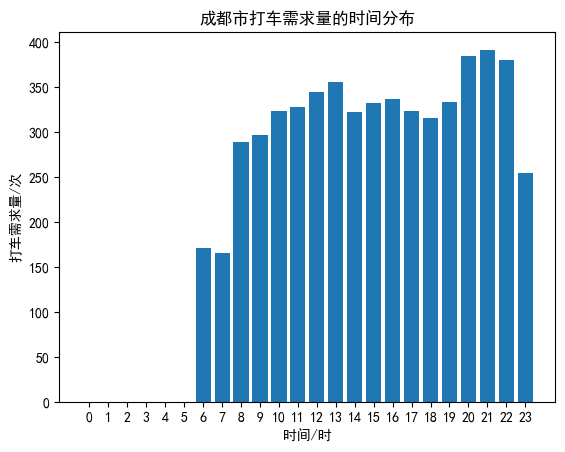

In [23]:
# 画出time_distribution的柱状图
plt.title('成都市打车需求量的时间分布')
plt.xlabel('时间/时')
plt.ylabel('打车需求量/次')
plt.xticks(range(24)) # 调整x轴的刻度
plt.bar(range(24), time_distribution)
plt.savefig('成都市打车需求量的时间分布.png',dpi=300,bbox_inches='tight')



可以根据`trip_df`中每单的起始时间，根据24小时进行分布统计，得到一天内的打车需求时间分布

计算目标:成都市一天内的打车需求地区分布